In [284]:
pip install mplsoccer

   ---------------------------------------- 0.0/85.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.8 kB ? eta -:--:--
   --------- ------------------------------ 20.5/85.8 kB 320.0 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/85.8 kB 325.1 kB/s eta 0:00:01
   ------------------- -------------------- 41.0/85.8 kB 388.9 kB/s eta 0:00:01
   ---------------------------------------- 85.8/85.8 kB 604.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsbombpy

     ---------------------------------------- 0.0/63.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/63.6 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 30.7/63.6 kB 217.9 kB/s eta 0:00:01
     ------------------------------ ------- 51.2/63.6 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 63.6/63.6 kB 310.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/61.4 kB ? eta -:--:--
   ---------------------------------------- 61.4/61.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.2 kB ? eta -:--:--
   ---------------------------------------- 66.2/66.2 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
import warnings
warnings.filterwarnings("ignore")

In [286]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [90]:
competitions = sb.competitions()
competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [92]:
df_competitions = competitions.loc[:,["competition_id","competition_name","season_name"]]

In [94]:
df_competitions["competition_name"].value_counts()

competition_name
Champions League           18
La Liga                    18
FIFA World Cup              8
Ligue 1                     3
Copa del Rey                3
FA Women's Super League     3
1. Bundesliga               2
UEFA Euro                   2
Serie A                     2
Premier League              2
Liga Profesional            2
Women's World Cup           2
African Cup of Nations      1
Major League Soccer         1
North American League       1
NWSL                        1
Indian Super league         1
FIFA U20 World Cup          1
Copa America                1
UEFA Europa League          1
UEFA Women's Euro           1
Name: count, dtype: int64

In [96]:
df_competitions[df_competitions["competition_name"] == "UEFA Euro"]

,competition_id,competition_name,season_name
68,55,UEFA Euro,2024
69,55,UEFA Euro,2020


In [98]:
euro_2024_matches = sb.matches(competition_id=55, season_id=282)
euro_2024_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [238]:
match = 3943043
#final match (spain vs england)

events_df = sb.events(match_id = match)
events_df.head(5)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [240]:
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [242]:
events_df[["x","y"]] = events_df["location"].apply(pd.Series)
events_df[["pass_end_x","pass_end_y"]] = events_df["pass_end_location"].apply(pd.Series)
events_df[["carry_end_x","carry_end_y"]] = events_df["carry_end_location"].apply(pd.Series)

In [243]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [244]:
eng = "England"
esp = "Spain"
f3rd_passes = events_df[
    (events_df.team == eng) & 
    (events_df.type == "Pass") & 
    (events_df.x < 80) &  # 80, sahadaki x koordinatını temsil eder. Üçüncü bölge için bu değer değişebilir.
    (events_df.pass_end_x >= 80)  # Pasın tamamlandığı yerin üçüncü bölgede olup olmadığını kontrol ediyoruz.
]
f3rd_passes_count = f3rd_passes.groupby("player").size().reset_index()

In [245]:
f3rd_passes_count

,player,0
0,Cole Palmer,2
1,Declan Rice,3
2,Harry Kane,3
3,John Stones,6
4,Jordan Pickford,13
5,Jude Bellingham,1
6,Kyle Walker,5
7,Luke Shaw,1
8,Marc Guehi,2


In [246]:
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]:"Passes"},inplace = True)
f3rd_passes_count
#ingiltereli oyuncuların 3. bölgeye gönderilen paslarına baktık.

,player,Passes
0,Cole Palmer,2
1,Declan Rice,3
2,Harry Kane,3
3,John Stones,6
4,Jordan Pickford,13
5,Jude Bellingham,1
6,Kyle Walker,5
7,Luke Shaw,1
8,Marc Guehi,2


In [247]:
#3. bölgede top sürme eylemi

f3rd_carries = events_df[
    (events_df.type == "Carry") & 
    (events_df.x < 80) &  # Carry'nin başladığı konum
    (events_df.carry_end_x >= 80) & # Carry'nin bittiği konum, üçüncü bölgeyi ifade eden koordinatın ilerisine ulaşmış olmalı
    (events_df.team == eng)
]
f3rd_carries_count = f3rd_carries.groupby("player").size().reset_index()
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]:"Carries"},inplace = True)
f3rd_carries_count

,player,Carries
0,Bukayo Saka,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
4,Jude Bellingham,4
5,Luke Shaw,1
6,Phil Foden,1


In [252]:
progression_df = pd.merge(f3rd_passes_count, f3rd_carries_count, how="outer",on=["player"])
progression_df

,player,Passes,Carries
0,Bukayo Saka,NaN,4.0
1,Cole Palmer,2.0,1.0
2,Declan Rice,3.0,NaN
3,Harry Kane,3.0,1.0
4,John Stones,6.0,1.0
5,Jordan Pickford,13.0,NaN
6,Jude Bellingham,1.0,4.0
7,Kyle Walker,5.0,NaN
8,Luke Shaw,1.0,1.0
9,Marc Guehi,2.0,NaN


In [255]:
progression_df = progression_df.fillna(0)
progression_df

,player,Passes,Carries
0,Bukayo Saka,0.0,4.0
1,Cole Palmer,2.0,1.0
2,Declan Rice,3.0,0.0
3,Harry Kane,3.0,1.0
4,John Stones,6.0,1.0
5,Jordan Pickford,13.0,0.0
6,Jude Bellingham,1.0,4.0
7,Kyle Walker,5.0,0.0
8,Luke Shaw,1.0,1.0
9,Marc Guehi,2.0,0.0


In [256]:
#pasla ve top taşıyarak 3. bölgeye totalde giriş

progression_df["total"] = progression_df["Passes"] + progression_df["Carries"]
progression_df

,player,Passes,Carries,total
0,Bukayo Saka,0.0,4.0,4.0
1,Cole Palmer,2.0,1.0,3.0
2,Declan Rice,3.0,0.0,3.0
3,Harry Kane,3.0,1.0,4.0
4,John Stones,6.0,1.0,7.0
5,Jordan Pickford,13.0,0.0,13.0
6,Jude Bellingham,1.0,4.0,5.0
7,Kyle Walker,5.0,0.0,5.0
8,Luke Shaw,1.0,1.0,2.0
9,Marc Guehi,2.0,0.0,2.0


In [258]:
#şimdi ispanyaya bakalım

In [259]:
f3rd_passes_esp = events_df[
    (events_df.team == esp) & 
    (events_df.type == "Pass") & 
    (events_df.x < 80) &  # 80, sahadaki x koordinatını temsil eder. Üçüncü bölge için bu değer değişebilir.
    (events_df.pass_end_x >= 80)  # Pasın tamamlandığı yerin üçüncü bölgede olup olmadığını kontrol ediyoruz.
]
f3rd_passes_count_esp = f3rd_passes_esp.groupby("player").size().reset_index()
f3rd_passes_count_esp.rename(columns={f3rd_passes_count_esp.columns[1]:"Passes"},inplace = True)

f3rd_carries_esp = events_df[
    (events_df.type == "Carry") & 
    (events_df.x < 80) &  # Carry'nin başladığı konum
    (events_df.carry_end_x >= 80) & # Carry'nin bittiği konum, üçüncü bölgeyi ifade eden koordinatın ilerisine ulaşmış olmalı
    (events_df.team == esp)
]
f3rd_carries_count_esp = f3rd_carries_esp.groupby("player").size().reset_index()
f3rd_carries_count_esp.rename(columns={f3rd_carries_count_esp.columns[1]:"Carries"},inplace = True)

progression_df_esp = pd.merge(f3rd_passes_count_esp, f3rd_carries_count_esp, how="outer",on=["player"])

progression_df_esp = progression_df_esp.fillna(0)

progression_df_esp["total"] = progression_df_esp["Passes"] + progression_df_esp["Carries"]
progression_df_esp

,player,Passes,Carries,total
0,Aymeric Laporte,11,3.0,14.0
1,Daniel Carvajal Ramos,4,0.0,4.0
2,Daniel Olmo Carvajal,4,2.0,6.0
3,Fabián Ruiz Peña,8,2.0,10.0
4,Lamine Yamal Nasraoui Ebana,2,2.0,4.0
5,Marc Cucurella Saseta,2,0.0,2.0
6,Martín Zubimendi Ibáñez,1,3.0,4.0
7,Nicholas Williams Arthuer,1,1.0,2.0
8,Robin Aime Robert Le Normand,11,1.0,12.0
9,Rodrigo Hernández Cascante,3,0.0,3.0


In [264]:
#iki takımın karşılaştırması bu şekilde. kısaca bir bakarsak ispanya tarafının ayağı daha düzgün stoperleri olurken
#ingiltere tarafının ayağı düzgün kalecisi olduğu görülür.
#marc guehiden 2 pas John stonesdan 3 pas görüyoruz.
#le Normand ve Laporte ise 11 er uzun topla 3. bölgeye girmişler. 
#Hatta laporte zaman zaman 3. bölgeye koşular atan ofansif stoper olduğu gözlemleniyor.

eng_total = progression_df['total'].sum()
esp_total = progression_df_esp['total'].sum()
f3rd_total = {
    'team_name': [eng, esp],
    'total_3rd_area': [eng_total, esp_total]
}
f3rd_total_df = pd.DataFrame(f3rd_total)
f3rd_total_df

,team_name,total_3rd_area
0,England,49.0
1,Spain,67.0


In [266]:
progression_df_esp.sort_values(by = "total",ascending = False,inplace=True)
progression_df_esp

,player,Passes,Carries,total
0,Aymeric Laporte,11,3.0,14.0
8,Robin Aime Robert Le Normand,11,1.0,12.0
3,Fabián Ruiz Peña,8,2.0,10.0
2,Daniel Olmo Carvajal,4,2.0,6.0
1,Daniel Carvajal Ramos,4,0.0,4.0
4,Lamine Yamal Nasraoui Ebana,2,2.0,4.0
6,Martín Zubimendi Ibáñez,1,3.0,4.0
11,Álvaro Borja Morata Martín,4,0.0,4.0
9,Rodrigo Hernández Cascante,3,0.0,3.0
5,Marc Cucurella Saseta,2,0.0,2.0


In [268]:
progression_df.sort_values(by = "total",ascending = False,inplace=True)
progression_df

,player,Passes,Carries,total
5,Jordan Pickford,13.0,0.0,13.0
4,John Stones,6.0,1.0,7.0
6,Jude Bellingham,1.0,4.0,5.0
7,Kyle Walker,5.0,0.0,5.0
0,Bukayo Saka,0.0,4.0,4.0
3,Harry Kane,3.0,1.0,4.0
1,Cole Palmer,2.0,1.0,3.0
2,Declan Rice,3.0,0.0,3.0
8,Luke Shaw,1.0,1.0,2.0
9,Marc Guehi,2.0,0.0,2.0


In [270]:
# DataFrame'leri birleştirin
progression_all = pd.merge_ordered(progression_df, progression_df_esp, on="player")
progression_all

,player,Passes_x,Carries_x,total_x,Passes_y,Carries_y,total_y
0,Aymeric Laporte,NaN,NaN,NaN,11.0,3.0,14.0
1,Bukayo Saka,0.0,4.0,4.0,NaN,NaN,NaN
2,Cole Palmer,2.0,1.0,3.0,NaN,NaN,NaN
3,Daniel Carvajal Ramos,NaN,NaN,NaN,4.0,0.0,4.0
4,Daniel Olmo Carvajal,NaN,NaN,NaN,4.0,2.0,6.0
5,Declan Rice,3.0,0.0,3.0,NaN,NaN,NaN
6,Fabián Ruiz Peña,NaN,NaN,NaN,8.0,2.0,10.0
7,Harry Kane,3.0,1.0,4.0,NaN,NaN,NaN
8,John Stones,6.0,1.0,7.0,NaN,NaN,NaN
9,Jordan Pickford,13.0,0.0,13.0,NaN,NaN,NaN


In [272]:
#x ve y karmasasini gidermek icin

progression_all['Passes'] = progression_all['Passes_x'].combine_first(progression_all['Passes_y'])
progression_all['Carries'] = progression_all['Carries_x'].combine_first(progression_all['Carries_y'])
progression_all['total'] = progression_all['total_x'].combine_first(progression_all['total_y'])
progression_all = progression_all.drop(columns=['Passes_x', 'Passes_y','Carries_x', 'Carries_y','total_x', 'total_y'])

progression_all.sort_values(by = "total",ascending = False,inplace=True)
progression_all

,player,Passes,Carries,total
0,Aymeric Laporte,11.0,3.0,14.0
9,Jordan Pickford,13.0,0.0,13.0
19,Robin Aime Robert Le Normand,11.0,1.0,12.0
6,Fabián Ruiz Peña,8.0,2.0,10.0
8,John Stones,6.0,1.0,7.0
4,Daniel Olmo Carvajal,4.0,2.0,6.0
10,Jude Bellingham,1.0,4.0,5.0
11,Kyle Walker,5.0,0.0,5.0
7,Harry Kane,3.0,1.0,4.0
3,Daniel Carvajal Ramos,4.0,0.0,4.0


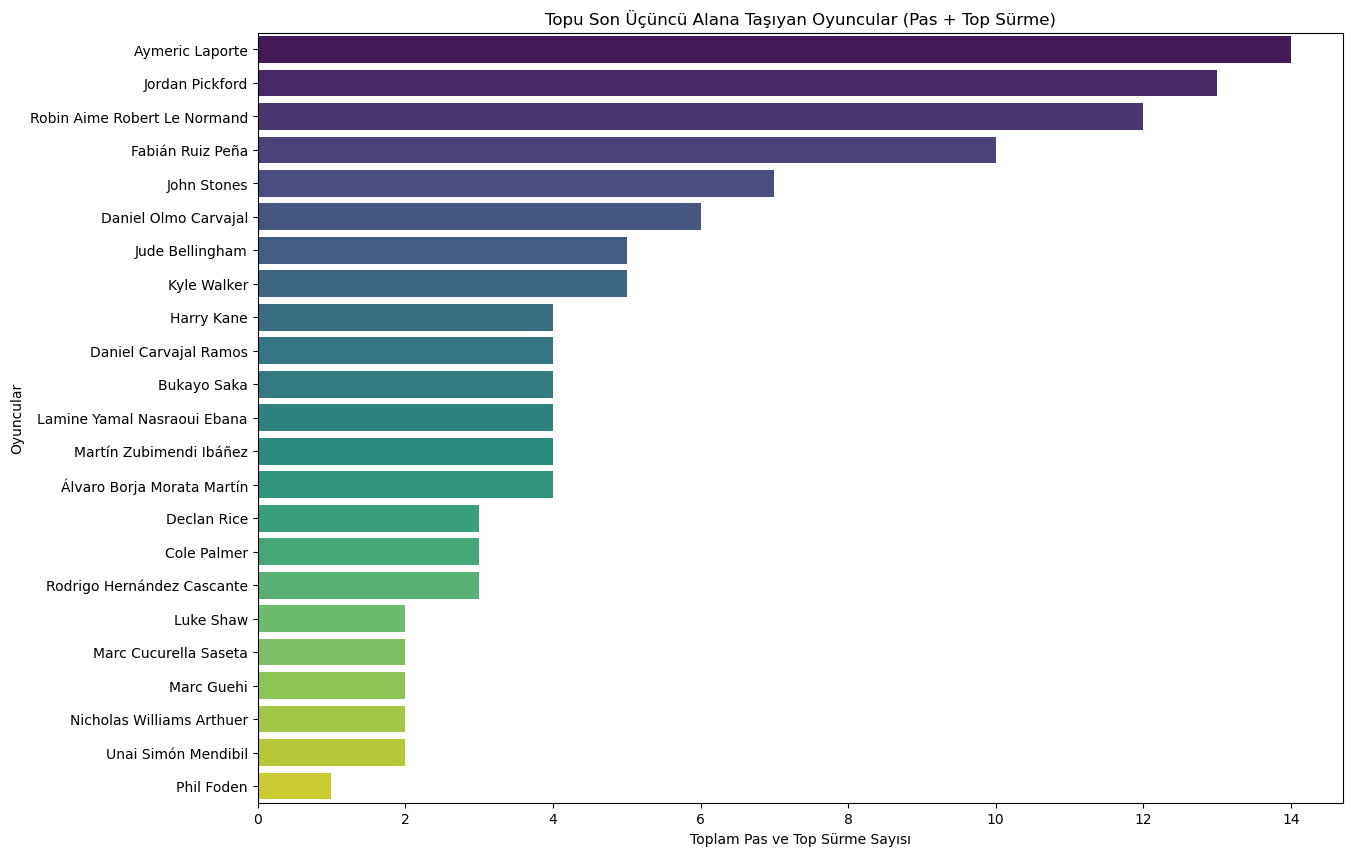

In [274]:
# Toplam Pas ve Top Sürme Sayısını Yönlendiren Bir Bar Grafiği

plt.figure(figsize=(14, 10))

progression_all_sorted = progression_all.sort_values(by='total', ascending=False)

sns.barplot(x='total', y='player', data=progression_all, palette='viridis')
plt.title('Topu Son Üçüncü Alana Taşıyan Oyuncular (Pas + Top Sürme)')
plt.xlabel('Toplam Pas ve Top Sürme Sayısı')
plt.ylabel('Oyuncular')
plt.show()

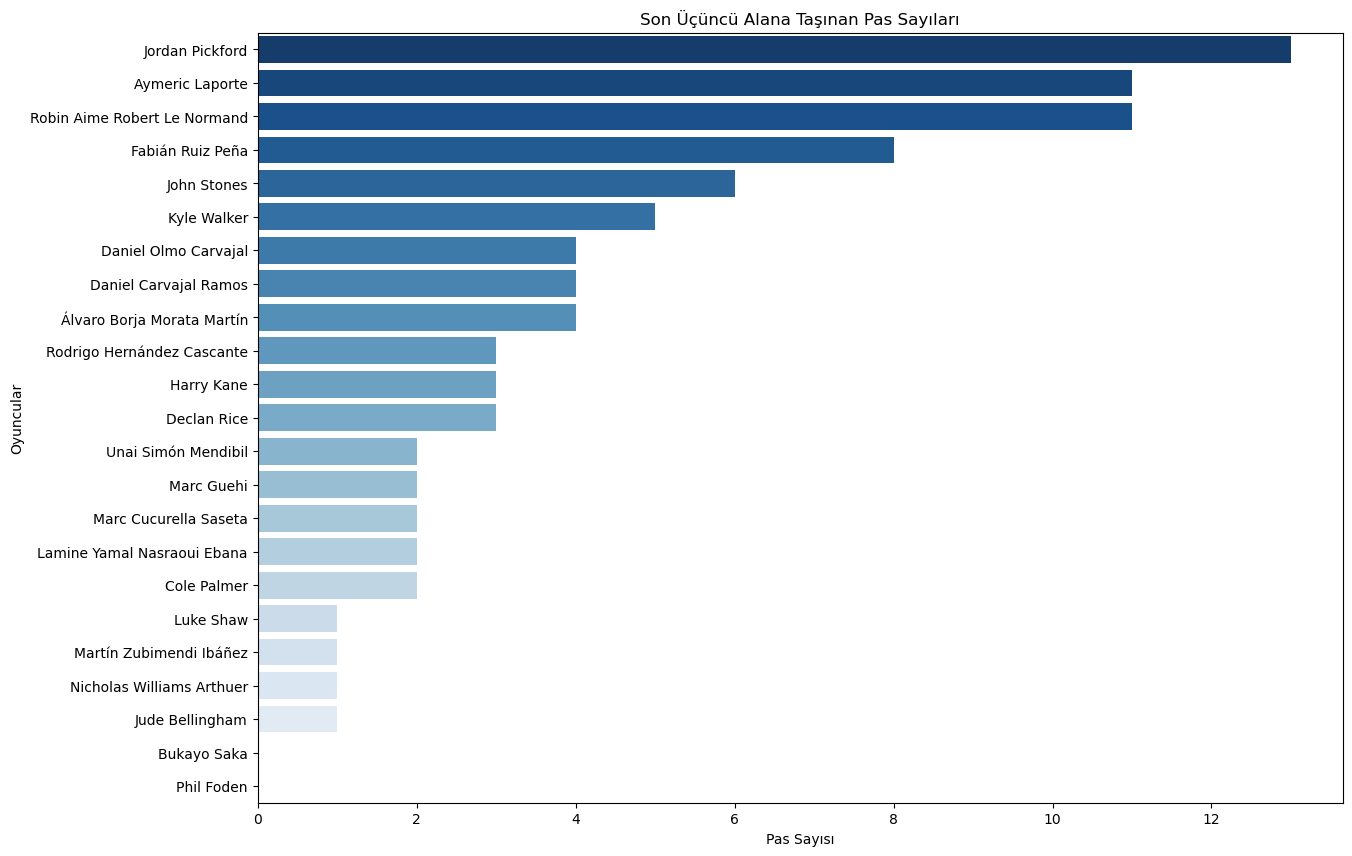

In [275]:
# Pas Sayıları
plt.figure(figsize=(14, 10))
progression_all_sorted_passes = progression_all.sort_values(by='Passes', ascending=False)
sns.barplot(x='Passes', y='player', data=progression_all_sorted_passes, palette='Blues_r')
plt.title('Son Üçüncü Alana Taşınan Pas Sayıları')
plt.xlabel('Pas Sayısı')
plt.ylabel('Oyuncular')
plt.show()


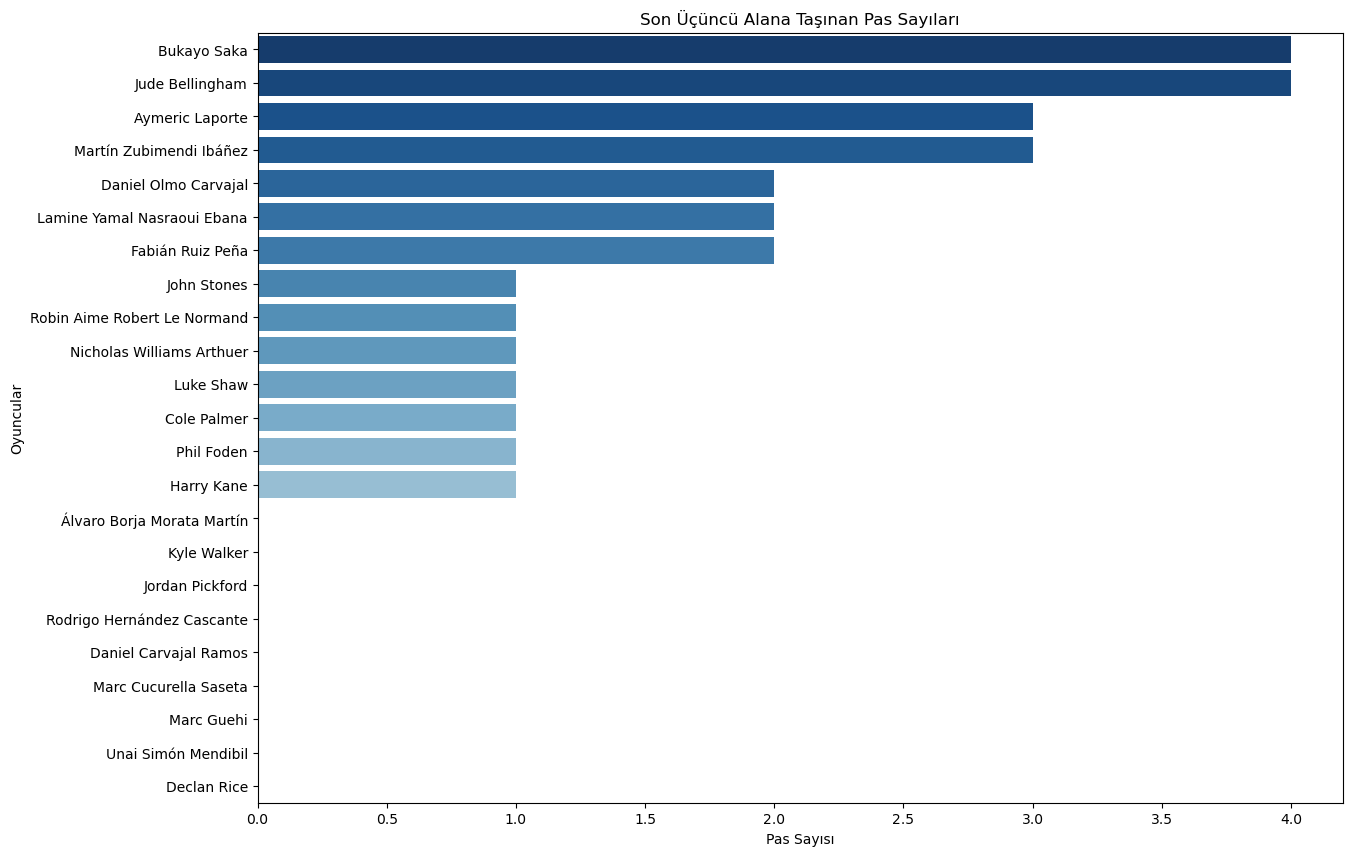

In [277]:
# top surme Sayıları
plt.figure(figsize=(14, 10))
progression_all_sorted_carries = progression_all.sort_values(by='Carries', ascending=False)
sns.barplot(x='Carries', y='player', data=progression_all_sorted_carries, palette='Blues_r')
plt.title('Son Üçüncü Alana Taşınan Pas Sayıları')
plt.xlabel('Pas Sayısı')
plt.ylabel('Oyuncular')
plt.show()

In [288]:
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist